In [233]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

# Домашнее задание 9   
> Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
> ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

In [234]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

## Задача 1

> Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

1. По формулам

In [235]:
b1 = ((zp * ks).mean() - (zp).mean() * (ks).mean()) / ((zp ** 2).mean() - zp.mean() ** 2)
b1

2.620538882402765

In [236]:
b1 * zp

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

In [237]:
b0 = ks.mean() - b1 * zp.mean()
b0

444.1773573243596

In [238]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

2. Матричный метод

In [239]:
x = zp.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [240]:
y = ks.reshape(-1, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [241]:
b_1 = (np.linalg.inv(x.T @ x) @ x.T @ y)[0,0]
b_1

5.889820420132689

In [242]:
x1 = np.hstack((np.ones([10, 1]), x))
x1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [243]:
b_1_0 =(np.linalg.inv(x1.T @ x1) @ x1.T @ y)
b_1_0[0,0],b_1_0[1,0]

(444.1773573243596, 2.6205388824027636)

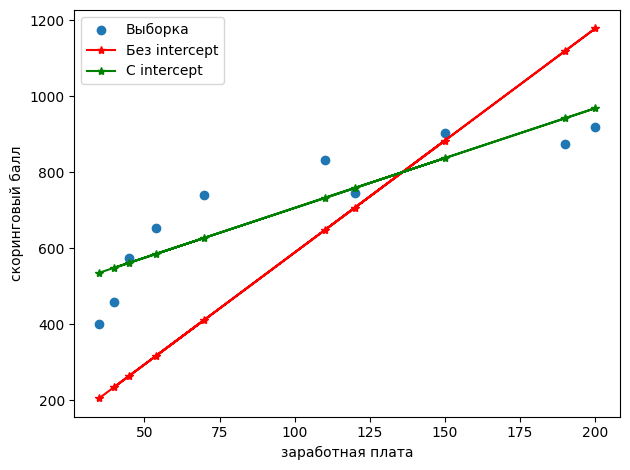

In [244]:
plt.scatter(zp, ks, label='Выборка')
plt.xlabel("заработная плата")
plt.ylabel("скоринговый балл")
plt.plot(x, b_1*zp, 'r*-', label = 'Без intercept')
plt.plot(x, b_1_0[0,0] + b_1_0[1,0] * zp, "g*-", label = 'C intercept')
plt.tight_layout()
plt.legend()
plt.show()


## Задача 2

>- Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [245]:
def mse_(b1, x=zp, y=ks, n=zp.shape[0]):
    return ((b1 * x - y) ** 2).sum() / n

n = zp.shape[0]
alpha = 1e-6
B1 = 0.1
for i in range(3000):
    B1 -= alpha * 2 / n * ((B1 * x - y ) * x).sum()
    if not i % 500:
        print(f'Iteration = {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration = 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943


In [246]:
mse_(5.88982)

56516.85841572182

## Задача 3

> Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Найдем производные

In [247]:
beta0, beta1, xi, yi, nn = sym.symbols('beta_0, beta_1, x, y, n')
SSE = ((yi - (beta0 + beta1 * xi)) ** 2)/nn

SSE

(-beta_0 - beta_1*x + y)**2/n

In [248]:
sym.diff(SSE,beta1)

-2*x*(-beta_0 - beta_1*x + y)/n

In [249]:
sym.diff(SSE,beta0)

(2*beta_0 + 2*beta_1*x - 2*y)/n

In [250]:
x, y = zp, ks
b0, b1 = 400, 0.1
n = x.shape[0]
lr = 1e-5
epochs = 6000000

for epoch in range(epochs +1):    
    cost_b0 = 2 /n * (b0 + b1 * x - y).sum()
    cost_b1 = -2 / n * ((y - b0 - b1*x)*x).sum()   
    b0 = b0 - lr * cost_b0
    b1 = b1 - lr * cost_b1
        
    
    if not epoch % 1000000:
        print(f'Iteration = {epoch}, B0 = {b0}, B1 = {b1}')

Iteration = 0, B0 = 400.0059952, B1 = 0.8840808000000001
Iteration = 1000000, B0 = 443.900790592795, B1 = 2.6225745358242567
Iteration = 2000000, B0 = 444.1756250834458, B1 = 2.6205516324617584
Iteration = 3000000, B0 = 444.177346474686, B1 = 2.62053896226116
Iteration = 4000000, B0 = 444.1773572562525, B1 = 2.6205388829040634
Iteration = 5000000, B0 = 444.17735731875723, B1 = 2.6205388824440012
Iteration = 6000000, B0 = 444.17735731875723, B1 = 2.6205388824440012


Проверка

In [251]:
model = LinearRegression()
x = x.reshape(-1, 1)

regres = model.fit(x, y)
b0 = regres.intercept_
b1 = regres.coef_[0]
b0,b1

(444.17735732435943, 2.6205388824027667)